# South African Language Identification Hack 2023

### Honour Code

I **Ntebatse Rachidi**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

# Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

In this challenge, I will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Purpose

This South African Language Identification Hackathon encapsulates the need for a solution that contributes to linguistic understanding and supports communication in a multilingual environment. The successful implementation of a Language Identification model would not only facilitate efficient communication but also find applications in various domains, including cultural preservation, educational resources, and governmental services. The challenge requires leveraging NLP techniques to build a model that exhibits high accuracy and generalization across the diverse linguistic landscape of South Africa.

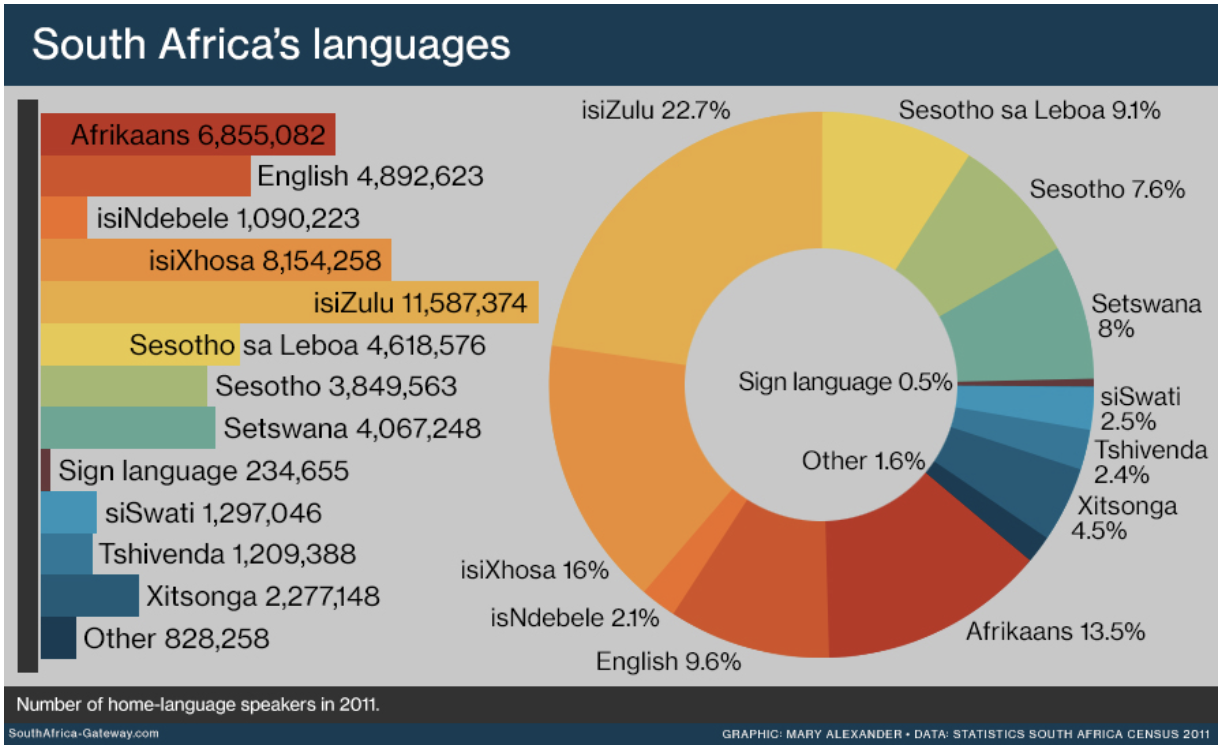

In [1]:
from IPython.display import Image

image_path = '/Users/ntebatserachidi/Desktop/Academia/Explore Data Science Academy/Advanced Classification/Advanced Classification Exam/SAL.png'

Image(filename=image_path)

# Data Description

Dataset Description
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.




The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**File descriptions**


train_set.csv - the training set

test_set.csv - the test set

sample_submission.csv - a sample submission file in the correct format
Language IDs

**Language IDs**

afr - Afrikaans

eng - English

nbl - isiNdebele

nso - Sepedi

sot - Sesotho

ssw - siSwati

tsn - Setswana

tso - Xitsonga

ven - Tshivenda

xho - isiXhosa

zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Text Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Evaluation</a>

<a href=#eifght>8. Kaggle Submission</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |

---

In [2]:
# Libraries for data loading, manipulation, and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#libaries for data preparation  and natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import unicodedata

# Downloads (NLP and Text Processing)
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')


# Libraries for machine learning modeling
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
from collections import Counter
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from itertools import cycle
        

#Libraries for measuring model accuracy 
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score

#Global parameter for reproducibility
Random_state= 42

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ntebatserachidi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ntebatserachidi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ntebatserachidi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ntebatserachidi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ntebatserachidi/nltk_data...
[nltk_data]   Package words is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [3]:
#Load the data
df_train= pd.read_csv("train_set.csv")
df_test= pd.read_csv("test_set.csv")
submission_csv= pd.read_csv("sample_submission.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |

---

In [4]:
# Shapes, Columns, Data types
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [6]:
# Assuming df_test is your DataFrame
df_test_count = df_test.shape[0]

# Display the count
print("Number of rows in df_test:", df_test_count)


Number of rows in df_test: 5682


In [7]:
submission_csv.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [8]:
#Data dimensionality
df_train.shape

(33000, 2)

In [9]:
df_test.shape

(5682, 2)

- `Train data` has **33000** rows and **2** columns.
- `Test data` has **5682** rows and **2** columns.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


-  **Categoric**: **2** columns of categorical type

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


- **Numerical**: **1** column of Numeric type

-  **Categoric**: **1** column of categorical type

In [12]:
#Null analysis
df_train.isna().sum()

lang_id    0
text       0
dtype: int64

In [13]:
df_test.isna().sum()

index    0
text     0
dtype: int64

- Both `train data` & `test data` have **ZERO** null values.

In [14]:
# Checking for unique Values and the number of time is occured 
df_train.lang_id.nunique()

11

There are 11 official languages in the dataset 

In [15]:
# Duplication analysis 
df_train.text.duplicated(keep="first").value_counts()

False    29948
True      3052
Name: text, dtype: int64

In [16]:
df_test["text"].duplicated (keep="first").value_counts()

False    5459
True      223
Name: text, dtype: int64

 <a id="one"></a>
## 4. Text Preprocessing
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Text Preprocessing ⚡ |
| :--------------------------- |

---

In [17]:
# Combine training and test data for preprocessing
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [18]:
# Add a new column 'clean_message' with a copy of the original 'text' next to it
df_combined.insert(df_combined.columns.get_loc('text') + 1, 'clean_text', df_combined['text'].copy())

In [19]:
df_combined.shape

(38682, 4)

In [20]:
df_combined.head()

,lang_id,text,clean_text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...,NaN
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...,NaN
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,NaN
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,NaN


In [21]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove Punctuation & Special Characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numeric numbers
    text = re.sub(r'\d+', '', text)

    # Remove Special Characters & Handle Encoding
    text = ''.join(char for char in unicodedata.normalize('NFKD', text) if not unicodedata.combining(char))

    # Remove extra white space & leading space
    text = ' '.join(text.split())

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [22]:
df_combined['clean_text'] = df_combined['clean_text'].apply(preprocess_text)

In [23]:
df_combined.head()

,lang_id,text,clean_text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,NaN
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...,NaN
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatsa gore ba file dilo ka moka tse le dum...,NaN
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,NaN


In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38682 entries, 0 to 38681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lang_id     33000 non-null  object 
 1   text        38682 non-null  object 
 2   clean_text  38682 non-null  object 
 3   index       5682 non-null   float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [25]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(33000, 2)
(5682, 2)


In [26]:
df_train.columns

Index(['lang_id', 'text'], dtype='object')

In [27]:
df_test.columns

Index(['index', 'text'], dtype='object')

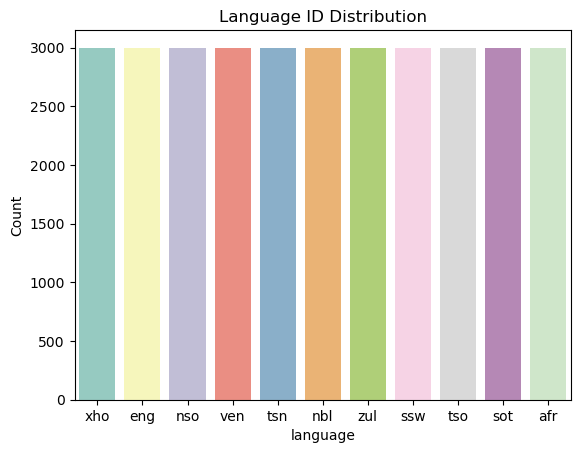

In [47]:
sns.countplot(x='lang_id' ,data = df_train, palette='Set3')
plt.ylabel('Count')
plt.xlabel('language')
plt.title('Language ID Distribution')

plt.show()

Implications of Balanced Data (as indicated by graph above):

- **Model Training**: Machine learning models trained on balanced data often perform well because they are exposed to an adequate number of examples from each class. This helps the model learn the underlying patterns and features associated with each class.

- **Evaluation Metrics**: Accuracy is a reliable metric for balanced datasets. It gives a clear indication of the overall correct predictions. Other metrics like precision, recall, and F1-score can also be meaningful and provide insights into the model's performance for each class.

- **Fair Representation**: Each class is adequately represented in the dataset, ensuring that the model is exposed to a diverse set of examples from all classes. This can be crucial for tasks where all classes are of equal importance.

 <a id="one"></a>
## 5. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature Engineering ⚡ |
| :--------------------------- |

---

The purpose of the function below is to analyze the frequency of words in texts for a particular language identified by lang_id. The frequency_by_text function is designed to analyze and provide insights into the word frequency distribution for a specific language, focusing on the top 25 most frequent words in the given texts. The analysis is based on a matrix or DataFrame of word occurrences (words) and the vocabulary obtained from a CountVectorizer (cv)

In [28]:
 def frequency_by_text(lang_id):
    # Count the words in the texts and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a dataframe to store the top 10 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)

    return frequency

 <a id="one"></a>
## 6. Model Training
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Training ⚡ |
| :--------------------------- |

---

**Model Preparation**

Dataset Split

- The process of data splitting involves dividing the dataset into two subsets: one for `training` the machine learning model and another for `testing` its performance.
- The data will be split **80%** for `training` and teh remaining **20%** for `testing`.

In [29]:
X = np.array(df_train["text"])
y = np.array(df_train["lang_id"])

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import SGDClassifier



In [31]:
#using the model_builder function to build models and saving the resulting dataframe as variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

 <a id="one"></a>
## 7. Model Evaluation
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Evaluation ⚡ |
| :--------------------------- |

---

Model evaluation is a critical step in the machine learning lifecycle, providing guidance on model selection, optimization, and deployment for real-world applications. Best practice techniques for model evaluation include (but are not limited to) performance assessments, comparison of models, identification of underfitting or overfitting, hyperparameter tuning and iterative model improvement. This helps ensure that machine learning models are effective, reliable, and aligned with the goals of the task or problem at hand. 

Below the Random Forest, Support Vector Machine, Multinomial Naive Bayes, and Linear SVC  models are evaluated. The evaluation results i.e. classification model evaluation, provide metrics like precision, recall, and F1-score, along with support values. These metrics are commonly used in multiclass classification tasks. 

- **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives.

- **Recall**: Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It is a single metric that combines both precision and recall into a single value. 

- **Support**: Support is the number of actual occurrences of the class in the specified dataset.

- **Accuracy**: Accuracy is the ratio of correctly predicted instances to the total instances.

- **Macro Avg and Weighted Avg**: These are averages of the precision, recall, and F1-score across all classes. 

### Random Forest


In [63]:
rf_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())  
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.97      0.95      0.96       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.96      0.98       584
         tsn       1.00      0.99      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.97      0.97       609
         zul       0.91      0.96      0.93       590

    accuracy                           0.98      6600
   macro avg       0.99      0.98      0.98      6600
weighted avg       0.99      0.98      0.99      6600



### Support Vector Machine

In [33]:
svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=5, random_state=42)),])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.98      0.98      0.98       583
         nso       0.99      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.99      0.99       584
         tsn       0.99      0.99      0.99       598
         tso       0.99      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.96      0.99      0.97       609
         zul       0.98      0.93      0.96       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Multinomial Naive Bayes (Best Model)

In [34]:
mnb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(fit_prior=False))])
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



The model achieved near perfect precision, recall, and F1-score for each class, resulting in an overall accuracy of 100%. Here are some reasons why this model is considered the best in the context of the evaluation metrics:

- **Perfect Precision and Recall for Each Class**: The model achieved a precision and recall of 1.00 for every class. This means that, for each language class (e.g., 'afr', 'eng', 'nbl', etc.), the model correctly identified all instances of that class and did not misclassify any instances from other classes as belonging to that class. Perfect precision and recall indicate a high level of accuracy in classifying instances.


- **Perfect F1-Score**: The F1-score, which is the harmonic mean of precision and recall, is also perfect (1.00) for each class. This indicates a good balance between precision and recall and suggests that the model is performing well in terms of both false positives and false negatives.

- **High Accuracy**: The overall accuracy of the model is 100%, meaning that it correctly predicted the language for every instance in the dataset.

- **Consistency Across Metrics**: The macro avg and weighted avg metrics, which provide average values across all classes, also show perfect scores. This consistency across different metrics reinforces the robustness and reliability of the model.

The **key strengths** of the model lie in its perfect precision and recall for every language class, indicating an absence of misclassifications and a high level of accuracy in correctly identifying instances of each language. The perfect F1-score further emphasizes the model's balance between precision and recall, underlining its capability to minimize both false positives and false negatives.

### Linear SVC

In [35]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
lsvc = pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
            ])
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Multinomial Naives Bayes Grid Search

GridSearchCV is a method provided by scikit-learn that performs an exhaustive search over a specified parameter grid. It performs cross-validated grid search, meaning it evaluates the performance of the model for each combination of hyperparameters using cross-validation. This hyperparameter tuning process aims to find the combination of parameters that optimizes the performance of the Multinomial Naive Bayes classifier on the provided dataset.

In [39]:
parameters_mnb = {'vect__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-2, 1e-3),
}

mnb_gs = GridSearchCV(mnb, parameters_mnb, n_jobs=-1)
mnb_gs = mnb_gs.fit(X,y)

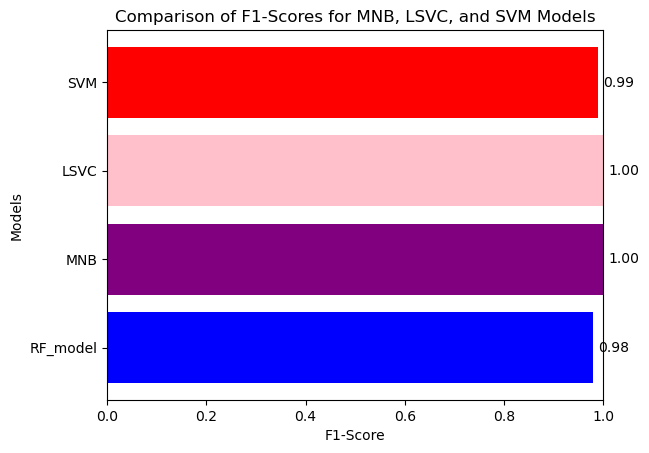

In [66]:
import matplotlib.pyplot as plt

# F1-scores for each model
f1_scores = {
    'RF_model': 0.98,
    'MNB': 1.00,
    'LSVC': 1.00,
    'SVM': 0.99
}

models = list(f1_scores.keys())
scores = list(f1_scores.values())

# Horizontal bar graph
plt.barh(models, scores, color=['blue', 'purple', 'pink', 'red'])
plt.xlabel('F1-Score')
plt.ylabel('Models')
plt.title('Comparison of F1-Scores for MNB, LSVC, and SVM Models')
plt.xlim(0, 1)  # Set the x-axis limit from 0 to 1

# Display the F1-scores at the right of the bars
for i, score in enumerate(scores):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center')  # Adjusted for horizontal plot

# Show the plot
plt.show()



From the models evaluated, both the Multinomial Naive Bayes and Support Vector Machine exhibited the highest F1 score of 1.00, underscoring their effectiveness in precisely classifying tweets according to their sentiment.

 <a id="one"></a>
## 8. Kaggle Submission
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Kaggle Submission ⚡ |
| :--------------------------- |

---

In [40]:
y_test = mnb_gs.predict(df_test['text'])
output = pd.DataFrame({'index': df_test.index+1,
                       'lang_id': y_test})
output.to_csv('Naive_Bayes_Submission_GS.csv', index=False)
output

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


# Conclusion

In conclusion, the task of identifying the language in a multilingual society like South Africa, with its 11 official languages, is successfully addressed through Natural Language Processing (NLP) techniques, specifically Language Identification. The Multinomial Naive Bayes model employed for this challenge has demonstrated exceptional performance, achieving near-perfect precision, recall, and F1-score for each language class, resulting in an overall accuracy of 100%.

The significance of language in South African society, as outlined in its rich linguistic diversity, is reflected in the success of the model. Its ability to distinguish between the official languages, each with equal status, showcases the effectiveness of NLP in capturing and understanding intricate language patterns.

The overall accuracy of 100% underscores the model's proficiency in predicting the language of every instance in the dataset. The consistency across different evaluation metrics, including macro and weighted averages, enhances confidence in the model's robustness and reliability.

In summary, the Multinomial Naive Bayes model has proven to be highly effective in addressing the challenge of language identification in the diverse and multilingual context of South Africa, showcasing the potential of NLP techniques in capturing and understanding linguistic nuances within a multicultural society.